In [1]:
import pandas as pd
import datetime
from datetime import timedelta, date
import numpy as np

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

# Citation for Data set 
# Johns Hopkins University. (2020). JHU CSSE COVID-19 Data [Data file]. Retrieved from https://github.com/CSSEGISandData/COVID-19

url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
# Data for the US States available from 4-12-2020 at this new location
# Also includes testing data
url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'

us_states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming',
    'AS': 'American Samoa',
    'GU': 'Guam',
    'MP': 'Northern Mariana Islands',
    'PR': 'Puerto Rico',
    'VI': 'Virgin Islands'
}

us_states_abbrev = dict(map(reversed, us_states.items()))

us_states_fips_codes = {
    'AL': '01',
    'AK': '02',
    'AZ': '04',
    'AR': '05',
    'CA': '06',
    'CO': '08',
    'CT': '09',
    'DE': '10',
    'DC': '11',
    'FL': '12',
    'GA': '13',
    'HI': '15',
    'ID': '16',
    'IL': '17',
    'IN': '18',
    'IA': '19',
    'KS': '20',
    'KY': '21',
    'LA': '22',
    'ME': '23',
    'MD': '24',
    'MA': '25',
    'MI': '26',
    'MN': '27',
    'MS': '28',
    'MO': '29',
    'MT': '30',
    'NE': '31',
    'NV': '32',
    'NH': '33',
    'NJ': '34',
    'NM': '35',
    'NY': '36',
    'NC': '37',
    'ND': '38',
    'OH': '39',
    'OK': '40',
    'OR': '41',
    'PA': '42',
    'RI': '44',
    'SC': '45',
    'SD': '46',
    'TN': '47',
    'TX': '48',
    'UT': '49',
    'VT': '50',
    'VA': '51',
    'WA': '53',
    'WV': '54',
    'WI': '55',
    'WY': '56',
    'AS': '60',
    'GU': '66',
    'MP': '69',
    'PR': '72',
    'VI': '78'
}

COL_NAMES_1 = ['State', 'Country', 'UpdateDate', 'Confirmed', 'Deaths', 'Recovered']
COL_NAMES_2 = ['State', 'Country', 'UpdateDate', 'Confirmed', 'Deaths', 'Recovered',
               'Latitude', 'Longitude']
COL_NAMES_3 = ['FIPS', 'Admin2', 'State', 'Country', 'UpdateDate', 'Latitude', 'Longitude', 
               'Confirmed', 'Deaths', 'Recovered', 'Active', 'Combined_Key']

# Data for the US States available from 4-12-2020 at a new URL
# Also includes testing data
COL_NAMES_4 = ['State', 'Country', 'UpdateDate', 'Latitude', 'Longitude', 
               'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS',
               'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID',
               'ISO3', 'Testing_Rate', 'Hospitalization_Rate']

NEW_URL_DATE = date(2020, 4, 12)

DATAFRAME_START_DATE = date(2020, 2, 1)
STATE_NAME_START_DATE = date(2020, 3, 10)
COL_NAMES_1_END_DATE = date(2020, 3, 1)
COL_NAMES_2_END_DATE = date(2020, 3, 22)
COL_NAMES_3_END_DATE = date(2020, 4, 12)

FILENAME_DATE_FORMAT = "%m-%d-%Y"
FILENAME_EXTENSION = ".csv"

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

def read_file_to_df(single_date, df):

    url = url_1 if (single_date < NEW_URL_DATE) else url_2
    
    assert(single_date >= DATAFRAME_START_DATE and single_date <= datetime.date.today())
    if (single_date >= DATAFRAME_START_DATE and single_date < COL_NAMES_1_END_DATE):
        column_names = COL_NAMES_1
        col_types = {}
    elif (single_date >= COL_NAMES_1_END_DATE and single_date < COL_NAMES_2_END_DATE):
        column_names = COL_NAMES_2
        col_types = {}
    elif (single_date >= COL_NAMES_2_END_DATE and single_date < COL_NAMES_3_END_DATE):
        column_names = COL_NAMES_3
        col_types = {'FIPS': str}
    else:
        column_names = COL_NAMES_4
        col_types = {'FIPS': str}
    
    try:
        file_name = url + single_date.strftime(FILENAME_DATE_FORMAT) + FILENAME_EXTENSION
        print(file_name)

        df1 = pd.read_csv(file_name, header=0, names=column_names, dtype=col_types)

        # Save the report date 
        df1['Date'] = single_date

        # Make sure the numeric fields have the correct type
        df1[['Confirmed', 'Deaths', 'Recovered']] = df1[['Confirmed', 'Deaths', 'Recovered']].apply(pd.to_numeric, errors='coerce')
        if (single_date >= COL_NAMES_2_END_DATE):
            #df1[['Active', 'FIPS']] = df1[['Active', 'FIPS']].apply(pd.to_numeric, errors='coerce')
            df1[['Active']] = df1[['Active']].apply(pd.to_numeric, errors='coerce')
        if (single_date >= COL_NAMES_3_END_DATE):
            df1[['Incident_Rate', 'People_Tested', 'People_Hospitalized']] = df1[['Incident_Rate', 'People_Tested', 'People_Hospitalized']].apply(pd.to_numeric, errors='coerce')
            df1[['Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate']] = df1[['Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate']].apply(pd.to_numeric, errors='coerce')

        # Filter out US data if we are getting worldwide statistics from the old URL
        if (single_date < COL_NAMES_3_END_DATE):
            df1 = df1.loc[df1['Country'] == 'US']

        # More robust method would be to check if the column exists in the list of dataframe column names
        # Taking a more efficient approach
        if ('Country' in column_names):
            del df1['Country']
        if ('Admin2' in column_names):
            del df1['Admin2']
        if ('Combined_Key' in column_names):
            del df1['Combined_Key']
        if ('UID' in column_names):
            del df1['UID']
        if ('ISO3' in column_names):
            del df1['ISO3']
        if ('UpdateDate' in column_names):
            del df1['UpdateDate']

        # Older files have multiple records for each state. Summarize the counts for each state.
        if (single_date < COL_NAMES_2_END_DATE):
            # Washington, D.C. needs to be stored as DC
            df1['State'] = df1['State'].str.replace('D.C.', 'DC')
            # We need to extract the state code and provide summary information for the state
            if (single_date < STATE_NAME_START_DATE):
                city_state = df1['State'].str.split(', ', expand = True)
                # Some of the state codes have cruise ship names appended so we need to strip those
                df1['State'] = city_state[1].str[:2]

            df1 = df1.groupby(['State', 'Date']).agg(
                Confirmed = ('Confirmed', 'sum'),
                Deaths = ('Deaths', 'sum'),
                Recovered = ('Recovered', 'sum'))
            df1['Active'] = df1['Confirmed'] - df1['Deaths'] - df1['Recovered']
        elif (single_date >= COL_NAMES_2_END_DATE and single_date < COL_NAMES_3_END_DATE):
            df1 = df1.groupby(['State', 'Date']).agg(
                Confirmed = ('Confirmed', 'sum'),
                Deaths = ('Deaths', 'sum'),
                Recovered = ('Recovered', 'sum'),
                Active = ('Active', 'sum'))

        df1.reset_index(inplace=True)

        # We will eventually use the FIPS code to represent each state
        # First convert state names to the corresponding 2-letter code
        if (single_date >= STATE_NAME_START_DATE):
            df1['State'].replace(us_states_abbrev, inplace=True)

        if (single_date < COL_NAMES_3_END_DATE):
            df1['FIPS'] = df1['State'].map(us_states_fips_codes)

        df1['FIPS'] = df1['FIPS'].str.pad(width=2, side='left', fillchar='0')

    except Exception as e:
        print(str(e))
        
    else:
        df = df.append(df1)
        
    return df

start_date = DATAFRAME_START_DATE
end_date = datetime.date.today()
# Random start and end dates for testing only
#start_date = date(2020, 4, 12)
#end_date = date(2020, 4, 13)

df = pd.DataFrame()

# Read COVID-19 daily reports for US states and append them to the dataframe df
for single_date in daterange(start_date, end_date):
    df = read_file_to_df(single_date, df)
 
if  ('index' in list(df.columns.values)):
    del df['index']

df.reset_index(inplace=True, drop=True)

# Remove all rows for which the fips codes are not in our dictionary 
L = list(us_states_fips_codes.values())
df['FIPS1'] = df['FIPS'].str.extract('(' + '|'.join(L) + ')', expand=False).replace(us_states_fips_codes)
df = df.dropna(subset=['FIPS1'])
del df['FIPS1']

# Initialize latitude and longitude values for rows that do not have them 
# First create a dictionary with latitude values for each state and then use it to initialize the dataframe
# Ditto for longitude 
# There might be a better way
dfLatitude = df.groupby(['State']).agg({'Latitude': np.min})
dfLongitude = df.groupby(['State']).agg({'Longitude': np.min})
dictLatitudeLong = dfLatitude.to_dict()
dictLongitudeLong = dfLongitude.to_dict()
dictLatitude = dictLatitudeLong['Latitude']
dictLongitude = dictLongitudeLong['Longitude']

df['Latitude'] = df['State'].map(dictLatitude)
df['Longitude'] = df['State'].map(dictLongitude)
del df['State']

print("Dataframe with data for all dates and states")
print(df.head())

df.fillna(0, inplace=True)
print("Printing null columns")
print(df.columns[df.isnull().any()].tolist())

# Compute and add 'New_Cases' field
df.sort_values(by=['FIPS', 'Date'], inplace=True)

df['Prev_FIPS'] = df['FIPS'].shift(periods=1)
df['Prev_Confirmed'] = df['Confirmed'].shift(periods=1)
df['New_Cases_1'] = (df['Confirmed']-df['Prev_Confirmed']).where(df['FIPS'] == df['Prev_FIPS'])
df['New_Cases_2'] = (df['Confirmed']).where(df['FIPS'] != df['Prev_FIPS'])
df["New_Cases"] = df["New_Cases_1"].fillna(df["New_Cases_2"])
df.drop(['Prev_FIPS', 'Prev_Confirmed', 'New_Cases_1', 'New_Cases_2'], axis=1, inplace=True)

# https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature
# Lat long coordinates have a problem that they are 2 features that represent a three dimensional space. 
# This means that the long coordinate goes all around, which means the two most extreme values are actually very close together. 
# What I do in this case is map them to x, y and z coordinates. 
# This means close points in these 3 dimensions are also close in reality. 
# Depending on the use case you can disregard the changes in height and map them to a perfect sphere. 
# These features can then be standardized properly.
df['x'] = np.cos(df['Latitude']) * np.cos(df['Longitude'])
df['y'] = np.cos(df['Latitude']) * np.sin(df['Longitude'])
df['z'] = np.sin(df['Latitude']) 
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
print("Converted latitude and longitude...")
print(df.head())

# Confirmed = Deaths + Recovered + Active
# About a fifth of all rows (for all states) do not satisfy the above criterion
# So, we will keep the Confirmed field for now.
# Ideally, if one feature is a linear combination of the others, we would like to delete it 

df.set_index(['FIPS', 'x', 'y', 'z', 'Date'],inplace=True)
#df_changes = df.pct_change()
df_changes = df.copy()
df.reset_index(inplace=True)
df_changes.replace([np.inf, -np.inf], np.nan, inplace=True)
df_changes.fillna(0, inplace=True)
df_changes.reset_index(inplace=True)
#print("Created dataframe with percentage change...")
# Using absolute values with MinMaxScaler
print(df_changes.head())


https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-01-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-02-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-03-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-04-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-05-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-06-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-07-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-06-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-07-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-08-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-09-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-10-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-11-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-12-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_repo

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/06-09-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/06-10-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/06-11-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/06-12-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/06-13-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/06-14-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/06-15-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_c

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-12-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-13-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-14-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-15-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-16-2020.csv
Dataframe with data for all dates and states
         Date  Confirmed  Deaths  Recovered  Active FIPS  Latitude  Longitude  \
0  2020-02-01          1       0        0.0     1.0   04   33.7298  -111.4312   
1  2020-02-01          3       0        0.0     3.0   06   36.1162  -119.6816   
2  2020-02-01          2       0        0.0     2.0   17   40.

In [2]:
# Need to split data into training and test sets 
# The number of records for each state varies between 121 and 183
# Should we 
# a) divide the total number of records into a 75:25 split or
# b) divide the records for each state into a 75:25 split
# c) divide the number of days into a 75:25 split

# Currently going with option c
# Number of records in the training set for each state will vary
# Lot more records in later dates once covid spread to all states -
# Validation and test datasets end up with almost a third of the records 
# Todo: use option a

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from collections import deque

# TODO: Vary sequence length to get better predictions
SEQ_LEN  = 5
FUTURE_PERIOD_PREDICT = 3
FIELD_TO_PREDICT = "Active"
VALIDATION_SET_SIZE = 0.2
TEST_SET_SIZE = 0.1

num_attribs_scale = ['FIPS', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate', 
                     'People_Tested', 'People_Hospitalized', 
                     'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate', 
                     'New_Cases']
fips_column_index = df_changes.columns.get_loc("FIPS")
print("Fips column index")
print(fips_column_index)
num_attribs = ['Latitude', 'Longitude']
# TODO: one-hot encoding for FIPS
cat_attribs = ['FIPS']

# Populate columns for the future values and label them t+1, t+2, .... t+FUTURE_PERIOD_PREDICT
for i in range(FUTURE_PERIOD_PREDICT):
    df_changes[f"t+{i+1}"] = df_changes.groupby(['FIPS', 'x', 'y', 'z'])[f"{FIELD_TO_PREDICT}"].shift(-(i+1))
    num_attribs_scale.append(f"t+{i+1}")
    # Creating a date field that will be used to plot difference between predicted and actual values
    df_changes[f"Date_t+{i+1}"] = df_changes.groupby(['FIPS', 'x', 'y', 'z'])["Date"].shift(-(i+1))

# The above process will create some nan's for the future columns, so we will delete those
df_changes.dropna(inplace=True)
    
# Make sure that the data is sorted
df_changes.sort_values(by=['FIPS', 'x', 'y', 'z', 'Date'])
df_changes["FIPS"] = pd.to_numeric(df["FIPS"])

times = sorted(df_changes['Date'].unique())
print(len(times))

last_30_pct = times[int(-(VALIDATION_SET_SIZE + TEST_SET_SIZE)*len(times))]
print(last_30_pct)
last_10_pct = times[int(-(TEST_SET_SIZE)*len(times))]
print(last_10_pct)

main_df = df_changes[(df_changes['Date'] < last_30_pct)]
validation_df = df_changes[(df_changes['Date'] >= last_30_pct) & (df_changes['Date'] < last_10_pct)]
test_df = df_changes[df_changes['Date'] >= last_10_pct]
print(main_df.shape)
print(validation_df.shape)
print(test_df.shape)

del main_df['Date']
del validation_df['Date']
del test_df['Date']

# There must be a better way to do this.
# Unable to use pipeline since I need to build a batch of time series data that is grouped by FIPS code

#column_scaler = StandardScaler()
column_scaler = MinMaxScaler()

# The following statements generate a 'SettingWithCopyWarning' - not able to fix it
# temporary fix for now!
pd.options.mode.chained_assignment = None

main_df.loc[:, num_attribs_scale] = column_scaler.fit_transform(main_df.loc[:, num_attribs_scale])
#print(main_df.groupby(['FIPS']).size())
validation_df.loc[:, num_attribs_scale] = column_scaler.transform(validation_df.loc[:, num_attribs_scale])
test_df.loc[:, num_attribs_scale] = column_scaler.transform(test_df.loc[:, num_attribs_scale])
print(main_df.shape)
print(validation_df.shape)
print(test_df.shape)

# reset the warning
pd.options.mode.chained_assignment = 'warn'

print(column_scaler.get_params())
print(column_scaler.scale_)

def preprocess_df(df):
    print("Columns in dataframe is ")
    print(df.columns)
    print("Record length in dataframe is ")
    print(len(df))
    
    sequential_data = []
    y_dates = []
    fips_codes = []
    prev_days = deque(maxlen=SEQ_LEN)
    # Initialize to an invalid FIPS code
    prev_fips = -1
    
    for i in df.values:
        if (prev_fips == -1):
            prev_fips = i[fips_column_index]
        
        if (prev_fips != i[fips_column_index]):
            # New state - reset the deque
            prev_fips = i[fips_column_index]
            prev_days = deque(maxlen=SEQ_LEN)
            
        prev_days.append([n for n in i[:-(2*FUTURE_PERIOD_PREDICT)]])
        if (len(prev_days) == SEQ_LEN):
            y = []
            y_dates_row = []
            for j in range(FUTURE_PERIOD_PREDICT):
                y.append(i[-2*(FUTURE_PERIOD_PREDICT-j)])
                y_dates_row.append(i[-2*(FUTURE_PERIOD_PREDICT-j) + 1])
            sequential_data.append([np.array(prev_days), y])
            y_dates.append(y_dates_row)
            fips_codes.append(prev_fips)

    X = []
    y = []
    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)
        
    return np.array(X), np.array(y), y_dates, fips_codes

print("Preprocess main df")
X_train, y_train, y_train_dates, train_fips = preprocess_df(main_df)
print(X_train.shape)
print(y_train.shape)
print(y_train_dates[0])
print(y_train_dates[1])
print(train_fips[0])
print(train_fips[1000])
print("Preprocess validation df")
X_validation, y_validation, y_validation_dates, validation_fips = preprocess_df(validation_df)
print(X_validation.shape)
print(y_validation.shape)
print("Preprocess test df")
X_test, y_test, y_test_dates, test_fips = preprocess_df(test_df)
print(X_test.shape)
print(y_test.shape)

Fips column index
0
192
2020-06-15T00:00:00.000000000
2020-07-23T00:00:00.000000000
(5765, 22)
(2128, 22)
(1043, 22)
(5765, 21)
(2128, 21)
(1043, 21)
{'copy': True, 'feature_range': (0, 1)}
[1.29870130e-02 2.60875917e-06 3.24412003e-05 1.45431276e-05
 3.52424150e-06 4.94950258e-04 3.40762060e-07 1.11117284e-05
 1.42105263e-02 5.53139131e-05 2.59732235e-02 8.63930886e-05
 3.51805466e-06 3.51198817e-06 3.50718447e-06]
Preprocess main df
Columns in dataframe is 
Index(['FIPS', 'x', 'y', 'z', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate', 'New_Cases',
       't+1', 'Date_t+1', 't+2', 'Date_t+2', 't+3', 'Date_t+3'],
      dtype='object')
Record length in dataframe is 
5765
(5541, 5, 15)
(5541, 3)
[Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00')]
[Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'),

In [101]:
# Start with baseline metrics for the model
import tensorflow.keras as keras

EPOCHS = 20
BATCH_SIZE = 7

field_to_predict_column_index = validation_df.columns.get_loc(f"{FIELD_TO_PREDICT}")

# Create an empty array to hold predictions
y_pred = np.empty([X_test.shape[0], FUTURE_PERIOD_PREDICT])

# Predict that the data will remain constant for the next 'n' time steps for naive prediction
for i in range(FUTURE_PERIOD_PREDICT):
    y_pred[:, i] = X_test[:, SEQ_LEN - 1, field_to_predict_column_index]

print("Shape of predicted values array")
print(y_pred.shape)
print("Shape of test values array")
print(y_test.shape)
naive_forecasting_mse = np.mean(keras.losses.mean_squared_error(y_test[:, -1], y_pred[:, -1]))
print("Mean squared error using naive forecasting")
print(naive_forecasting_mse)

# Use a Linear Regression model to provide another baseline prediction
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_validation[0].shape),
    keras.layers.Dense(3)
])
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, 
                    validation_data=(X_validation, y_validation),
                    verbose=False)
y_pred_linear = model.predict(X_test)
linear_regression_mse = np.mean(keras.losses.mean_squared_error(y_test, y_pred_linear))

print("Mean squared error using linear regression")
print(linear_regression_mse)

# Deep RNN model
model_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape=X_validation[0].shape, return_sequences=True),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(3)
])
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
history = model_rnn.fit(X_train, y_train, 
                        epochs=EPOCHS, 
                        validation_data=(X_validation, y_validation),
                        verbose=False)
y_pred_rnn = model_rnn.predict(X_test)
rnn_mse = np.mean(keras.losses.mean_squared_error(y_test, y_pred_rnn))

print("Mean squared error using Deep RNN")
print(rnn_mse)

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

# LSTM model
model_lstm = keras.models.Sequential([
    keras.layers.LSTM(20, input_shape=X_validation[0].shape, return_sequences=True),
    keras.layers.LSTM(20),
    keras.layers.Dense(3)
])
optimizer = keras.optimizers.Adam(lr=0.01)
model_lstm.compile(loss='mse', optimizer=optimizer, metrics=[last_time_step_mse])
history = model_lstm.fit(X_train, y_train, 
                         epochs=EPOCHS, 
                         validation_data=(X_validation, y_validation),
                         verbose=False)
y_pred_lstm = model_lstm.predict(X_test)
lstm_mse = np.mean(keras.losses.mean_squared_error(y_test, y_pred_lstm))

print("Mean squared error using LSTM")
print(lstm_mse)


Shape of predicted values array
(819, 3)
Shape of test values array
(819, 3)
Mean squared error using naive forecasting
0.00022788248774713863
Mean squared error using linear regression
0.5477598
Mean squared error using Deep RNN
0.048485942
Mean squared error using LSTM
0.02324765


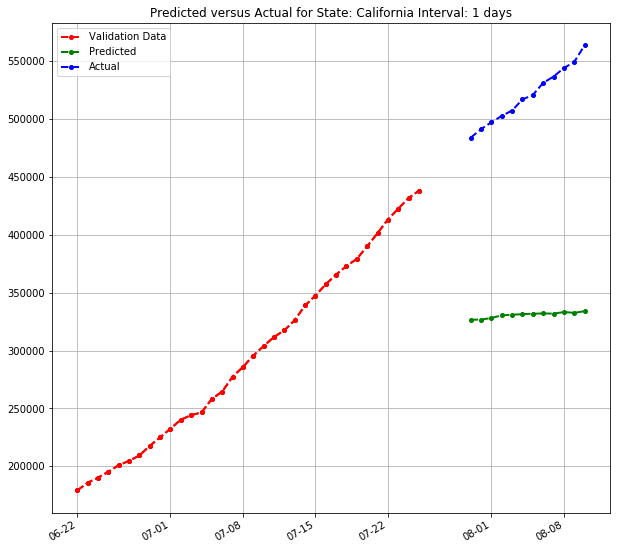

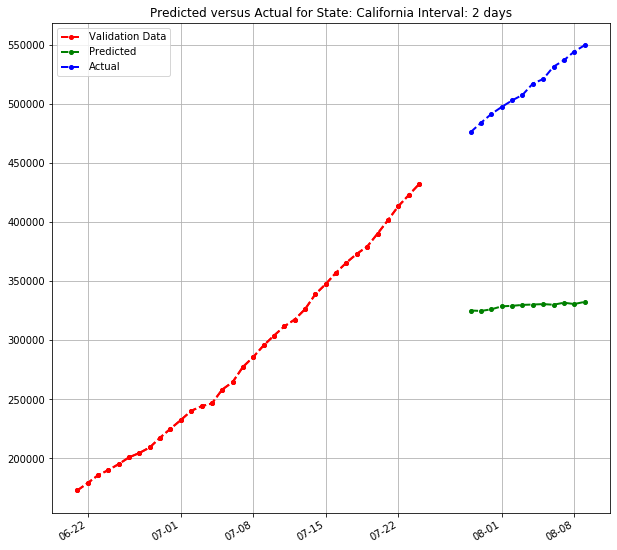

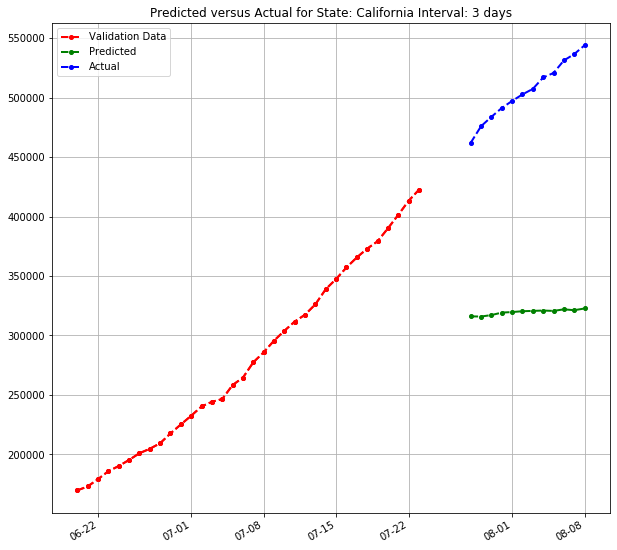

In [122]:
# This cell plots predicted versus actual data for the field being predicted

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# In order to resolve pandas 0.21.0 Timestamp compatibility issue with matplotlib
# Refer to 
# https://stackoverflow.com/questions/47404653/pandas-0-21-0-timestamp-compatibility-issue-with-matplotlib
pd.plotting.register_matplotlib_converters()

def plot_function_wrapper(state_code):
    
    for i in range(FUTURE_PERIOD_PREDICT):
        x_plot, y_plot_pred, y_plot_act, state_name = get_plot_x_y(y_validation, y_validation, y_validation_dates, validation_fips, state_code, -(i+1))
        plot_title = f'Predicted versus Actual for State: {state_name} Interval: {i+1} days'
        fig, ax = plot_pred_vs_actual(x_plot, y_plot_pred, y_plot_act, state_name, 
                                      color_pred="red", color_actual="red",
                                      title=plot_title)
        x_plot, y_plot_pred, y_plot_act, state_name = get_plot_x_y(y_pred_lstm, y_test, y_test_dates, test_fips, state_code, -(i+1))
        #print(np.column_stack((y_plot_pred, y_plot_act)))
        plot_pred_vs_actual(x_plot, y_plot_pred, y_plot_act, state_name, fig, ax, title=plot_title)

    return

# Display plot of predicted versus actual for the passed in state
def get_plot_x_y(y_predicted_scaled, y_actual_scaled, dates, states_scaled, us_state_code, predicted_column_index):
    if (predicted_column_index > -1 or predicted_column_index < -FUTURE_PERIOD_PREDICT):
        error_string = f"Column index must be between -1 and -{FUTURE_PERIOD_PREDICT}"
        raise ValueError(error_string)
    
    # Plot only the specified column in the y_ array
    scale = MinMaxScaler()
    scale.min_, scale.scale_ = column_scaler.min_[predicted_column_index], column_scaler.scale_[predicted_column_index]

    y_predicted = scale.inverse_transform(y_predicted_scaled[:, predicted_column_index].reshape(-1, 1))
    y_actual = scale.inverse_transform(y_actual_scaled[:, predicted_column_index].reshape(-1, 1))
    
    # Inverse scaling of FIPS codes
    scale.min_, scale.scale_ = column_scaler.min_[0], column_scaler.scale_[0]
    states_array = scale.inverse_transform(np.asarray(states_scaled).reshape(-1, 1))
    
    states_array_int = np.rint(np.asarray(states_array[:, 0], dtype=float))

    # Create a boolean with rows for which fips code matches that of the passed in state
    state_data = (states_array_int == int(us_states_fips_codes[us_state_code]))
    # Print predicted and actual data for the state

    return np.asarray(dates)[state_data, predicted_column_index], y_predicted[state_data], y_actual[state_data], us_states[us_state_code]
    
# Display plot of predicted versus actual for the passed in state
def plot_pred_vs_actual(x, y_pred, y_act, state_name, fig=None, ax=None, color_pred=None, color_actual=None, title=None):
    if (fig is None):
        fig, ax = plt.subplots(figsize=(10, 10))
        myFmt = mdates.DateFormatter('%m-%d')
        ax.xaxis.set_major_formatter(myFmt)
    
    if (color_pred is None):
        color_pred = 'green'
        legend_pred = "Predicted"
    else:
        legend_pred = "Validation Data"
        
    if (color_actual is None):
        color_actual = 'blue'
        legend_actual = "Actual"
    else:
        legend_actual = None
        
        
    plt.plot(x, y_pred, color=color_pred, marker='o', linestyle='dashed', linewidth=2, markersize=4, label=legend_pred)
    plt.plot(x, y_act, color=color_actual, marker='o', linestyle='dashed', linewidth=2, markersize=4, label=legend_actual)
    plt.title(title)
    plt.legend()

    ax.grid(True)
    fig.autofmt_xdate()
    
    plt.show
    return fig, ax

state_code = "CA"
plot_function_wrapper(state_code)

In [85]:
# Additional code used for data exploration
# Not used for prediction

# Issues with the data
# Technically, the count of confirmed cases should be the sum of the active cases, recovered cases and deaths
# However there are a number of records for each state for which the numbers don't add up
# The number of such 'valid' and 'invalid' records for each state is listed below
df1 = df[df['Confirmed']==(df['Active'] + df['Deaths'] + df['Recovered'])]
sf = df1.groupby(['FIPS']).size()
dfValid = pd.DataFrame({'FIPS':sf.index, 'Valid Row Count':sf.values})

df1 = df[df['Confirmed']!=(df['Active'] + df['Deaths'] + df['Recovered'])]
sf = df1.groupby(['FIPS']).size()
dfInvalid = pd.DataFrame({'FIPS':sf.index, 'Invalid Row Count':sf.values})

df1 = dfValid.join(dfInvalid.set_index('FIPS'), on='FIPS')
print(df1)

   FIPS  Valid Row Count  InValid Row Count
0    01              123               21.0
1    02              107               39.0
2    04              148               37.0
3    05              108               39.0
4    06              164               21.0
5    08              125               26.0
6    09              129               21.0
7    10              108               39.0
8    11              110               39.0
9    12              133               22.0
10   13              133               21.0
11   15              111               39.0
12   16              113               34.0
13   17              164               21.0
14   18              130               21.0
15   19              109               39.0
16   20              127               22.0
17   21              112               39.0
18   22              121               27.0
19   23              108               39.0
20   24              112               39.0
21   25              164        

In [61]:
# Additional code used for data exploration
# Not used for prediction

# Print date that showed a spike in number of Active cases
# Also, print maximum values for each field
def temp():
    df1 = df_changes[["FIPS", "Date", "Confirmed", "Deaths", "Recovered", "Active", "Incident_Rate", "People_Tested", "People_Hospitalized", "Mortality_Rate", "Testing_Rate", "Hospitalization_Rate", "New_Cases", "x", "y", "z"]]
    print(df1[df1['Active']==df1['Active'].max()])
    print(df1.max())
    
temp()

      FIPS       Date  Confirmed  Deaths  Recovered  Active  Incident_Rate  \
3597  26.0 2020-03-13        7.0     0.0        0.0     7.0            0.0   

      People_Tested  People_Hospitalized  Mortality_Rate  Testing_Rate  \
3597            0.0                  0.0             0.0           0.0   

      Hospitalization_Rate  New_Cases         x         y         z  
3597                   0.0        0.0 -0.760225 -0.224298 -0.609712  
FIPS                                     78
Date                    2020-07-29 00:00:00
Confirmed                                 7
Deaths                                    7
Recovered                               113
Active                                    7
Incident_Rate                       5.18341
People_Tested                       22.4595
People_Hospitalized                 2.50602
Mortality_Rate                      6.66667
Testing_Rate                        22.4595
Hospitalization_Rate                5.14371
New_Cases                 

In [62]:
# Additional code used for data exploration
# Not used for prediction

# New_Cases can only be negative when the Recovered count is greater than the New_Cases recorded in a day
# Display all such records with negative Active and New_Cases
print(df.loc[df['Active'] < 0])
print(df.loc[df['New_Cases'] < 0][["Date", "FIPS", "Confirmed", "Recovered", "Active", "New_Cases"]])

     FIPS         x         y         z       Date  Confirmed  Deaths  \
3870   27 -0.132508 -0.048006  0.990019 2020-07-05      38136    1508   
8639   69 -0.326824 -0.751631  0.572919 2020-06-03         24      16   
8640   69 -0.326824 -0.751631  0.572919 2020-06-04         26      16   
8641   69 -0.326824 -0.751631  0.572919 2020-06-05         26      16   
8642   69 -0.326824 -0.751631  0.572919 2020-06-06         26      17   
8643   69 -0.326824 -0.751631  0.572919 2020-06-07         27      19   

      Recovered  Active  Incident_Rate  People_Tested  People_Hospitalized  \
3870    37617.0  -989.0     676.214335       674015.0               4170.0   
8639       16.0    -8.0      43.522414         6557.0                  0.0   
8640       16.0    -6.0      47.149282         6695.0                  0.0   
8641       16.0    -6.0      47.149282         6695.0                  0.0   
8642       16.0    -7.0      47.149282         6695.0                  0.0   
8643       19.0   -1

In [5]:
# Additional code used for data exploration
# Not used for prediction

df.describe()

,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,New_Cases,x,y,z
count,7949.000000,7949.000000,7949.000000,7949.000000,7.949000e+03,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000,7949.000000
mean,1293.989181,6390.103032,17925.041263,359.680981,2.639506e+05,2509.354133,2.934172,4421.801571,6.275874,508.063404,-0.138585,-0.086180,0.076079
std,3664.749355,15618.077888,45025.571588,458.091614,5.779727e+05,9468.084827,3.032860,4932.295188,7.486474,1226.430028,0.485824,0.512362,0.684953
min,0.000000,0.000000,-989.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-141.000000,-0.987858,-0.956169,-0.999927
25%,10.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,15.000000,-0.559565,-0.513424,-0.505358
50%,153.000000,266.000000,2420.000000,177.559145,6.786900e+04,0.000000,2.677165,2752.032152,0.000000,139.000000,-0.077725,-0.152233,0.247311
75%,918.000000,4233.000000,13333.000000,533.425736,2.745780e+05,1498.000000,4.572987,7114.010962,11.831071,497.000000,0.181964,0.253714,0.686735
max,32594.000000,203826.000000,422572.000000,2186.588608,6.778304e+06,89995.000000,70.370370,27595.657165,38.501190,16017.000000,0.860371,0.940984,0.998820


In [17]:
# Additional code used for data exploration
# Not used for prediction

# Checking to see whether correlation exists between testing rate and new/confirmed cases
corr_matrix = df.corr()
corr_matrix["New_Cases"].sort_values(ascending=False)
print(df.columns.values)
corr_matrix = df.corr()
print(corr_matrix)

['Date' 'Deaths' 'Recovered' 'FIPS' 'Active' 'Incident_Rate'
 'People_Tested' 'People_Hospitalized' 'Mortality_Rate' 'Testing_Rate'
 'Hospitalization_Rate' 'New_Cases' 'x' 'y' 'z']
                        Deaths  Recovered    Active  Incident_Rate  \
Deaths                1.000000   0.513907  0.787119       0.624980   
Recovered             0.513907   1.000000  0.332343       0.516768   
Active                0.787119   0.332343  1.000000       0.605611   
Incident_Rate         0.624980   0.516768  0.605611       1.000000   
People_Tested         0.682006   0.518620  0.870039       0.558000   
People_Hospitalized   0.902108   0.378907  0.698434       0.518795   
Mortality_Rate        0.385139   0.219693  0.239570       0.395892   
Testing_Rate          0.391891   0.420925  0.395438       0.764313   
Hospitalization_Rate  0.264305   0.068189  0.196062       0.261013   
New_Cases             0.280646   0.335924  0.641471       0.327899   
x                    -0.068659  -0.093880 -0.1022